# Get members' nutrition info 
- get member's average calories, sodium, protein, fat, carbs (per serving per recipe) 

In [2]:
import pymongo 
import boto3 
from bs4 import BeautifulSoup as BS
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import community
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
allrecipes_db = client.allrecipes
members_coll = allrecipes_db.members
recipes_coll = allrecipes_db.recipes

In [4]:
members_coll.find_one().keys()

[u'followers_dict',
 u'reviews_dict',
 u'following_id_list',
 u'madeits_recipe_id_list',
 u'favorites_dict',
 u'reviews_recipe_id_list',
 u'nutrition_avg_vals',
 u'following_dict',
 u'member_ID',
 u'favorites_recipe_id_list',
 u'_id',
 u'aboutme',
 u'madeits_dict',
 u'followers_id_list']

In [5]:
eg_mem = members_coll.find_one({'madeits_recipe_id_list': {'$exists':True, '$size':20}})

In [6]:
eg_mem['member_ID']

u'1775895'

In [7]:
recipes = set(eg_mem['madeits_dict'].values() + eg_mem['favorites_dict'].values())

In [8]:
recipes

{u'102133',
 u'13482',
 u'14325',
 u'14397',
 u'146238',
 u'16359',
 u'16611',
 u'18074',
 u'19304',
 u'220325',
 u'220751',
 u'221091',
 u'221988',
 u'222615',
 u'222932',
 u'229780',
 u'22987',
 u'231030',
 u'232414',
 u'234415',
 u'238916',
 u'241267',
 u'25155',
 u'25364',
 u'38021',
 u'61674',
 u'62461962',
 u'62549419',
 u'63652701',
 u'64201826',
 u'64244607',
 u'64344329',
 u'64468946',
 u'75861',
 u'80658',
 u'84259',
 u'84270',
 u'8636',
 u'8778'}

In [9]:
import pandas as pd
nutes = {}
for r in recipes: 
    doc = recipes_coll.find_one({'recipe_ID': r})

    if not doc or not doc.get('Carbs'): 
        print "{} has no/incomplete document".format(r)
    else: 
        print doc['name'], doc.get('recipe_ID')
        nutes[doc['recipe_ID']]= [doc['name'][0],doc['Carbs'][0], doc['Calories'][0], doc['Protein'][0], doc['Fat'][0], doc['Sodium'][0]]
    npd = pd.DataFrame(index=nutes.keys(), data=nutes.values(), columns =['Name', 'Carbs', 'Calories', 'Protein', 'Fat', 'Sodium'] )

[u'Red Skinned Potato Salad'] 25155
[u"Kate's Black-Eyed Pea Salad"] 80658
64344329 has no/incomplete document
[u'Pasta Salad on a Stick'] 238916
[u'Marinated Flank Steak'] 18074
[u'Breakfast Sausage'] 16359
[u'Creamy Italian Dressing I'] 14325
[u'Lemony Cucumbers'] 14397
62461962 has no/incomplete document
[u'Slow-Cooker Corned Beef and Cabbage  '] 84270
[u'Winter Fruit Salad with Lemon Poppyseed Dressing'] 13482
[u'Cajun Chicken Pasta'] 8778
64201826 has no/incomplete document
[u'Margarita Cupcakes'] 241267
[u'Parmesan Chicken II'] 8636
[u'Country Apple Dumplings'] 102133
231030 has no/incomplete document
[u'Cornell Chicken'] 221091
[u'Thornehedge Peach Slaw'] 38021
[u'Baked Denver Omelet'] 229780
[u"Aimee's Quick Chicken"] 25364
[u'Chicken in a Pot'] 16611
[u'Oven BBQ Chicken Drumsticks'] 222932
64244607 has no/incomplete document
[u'Quick Chicken Piccata'] 220751
[u'Making Crispy Onion Rings'] 220325
[u'Red, White and Blue Strawberry Shortcake'] 22987
[u'Eggs Benedict Casserole'] 2

In [10]:
npd

,Name,Carbs,Calories,Protein,Fat,Sodium
25155,Red Skinned Potato Salad,16.2,430.0,9.5,36.9,536.0
14325,Creamy Italian Dressing I,2.4,139.0,1.0,14.6,153.0
18074,Marinated Flank Steak,3.4,275.0,14.8,22.5,935.0
16359,Breakfast Sausage,2.7,409.0,1.0,32.2,861.0
14397,Lemony Cucumbers,1.0,27.0,0.5,0.2,252.0
13482,Winter Fruit Salad with Lemon Poppyseed Dressing,21.0,277.0,4.9,20.6,201.0
8778,Cajun Chicken Pasta,54.0,935.0,43.7,61.7,1189.0
241267,Margarita Cupcakes,16.0,136.0,1.7,6.7,159.0
8636,Parmesan Chicken II,1.4,466.0,1.0,26.7,981.0
232414,The Girls' Chicken Sandwiches,51.0,437.0,21.9,10.1,379.0


In [11]:
npd.describe()

,Carbs,Calories,Protein,Fat,Sodium
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,20.767742,355.225806,16.151613,21.174194,806.225806
std,16.931064,204.489561,13.436837,15.421067,766.519307
min,1.000000,27.000000,0.500000,0.200000,1.000000
25%,5.550000,194.000000,2.200000,7.000000,238.000000
50%,17.500000,321.000000,17.500000,19.000000,712.000000
75%,33.000000,454.500000,24.600000,29.500000,1017.000000
max,54.000000,935.000000,43.700000,61.700000,3588.000000


In [32]:
def get_member_nutrition_values(memID): 
    mem_doc = members_coll.find_one({"member_ID":memID})
    mem_madeits = mem_doc['madeits_recipe_id_list']
    mem_faves = mem_doc['favorites_recipe_id_list']
    num_madeits = len(mem_madeits)
    num_favorites = len(mem_faves)
    print "{} made {} recipes and has {} favorites".format(memID, num_madeits, num_favorites)
    all_recs = set(mem_faves+mem_madeits)
    nutes = {}
    for r in all_recs: 
        doc = recipes_coll.find_one({'recipe_ID': r})

        if not doc or not doc.get('Carbs'): 
            print "{} has no/incomplete document".format(r)
        else: 
            print doc['name'], doc.get('recipe_ID')
            nutes[doc['recipe_ID']]= [doc['name'][0],doc['Carbs'][0], doc['Calories'][0], doc['Protein'][0], doc['Fat'][0], doc['Sodium'][0]]
    npd = pd.DataFrame(index=nutes.keys(), data=nutes.values(), columns =['Name', 'Carbs', 'Calories', 'Protein', 'Fat', 'Sodium'] )
    npd['fat_per_cals'] = npd['Fat']/npd['Calories']
    return npd.to_dict()
    

In [19]:
npd = get_member_nutrition_values('1775895')

1775895 made 20 recipes and has 40 favorites
[u'Red Skinned Potato Salad'] 25155
[u'Creamy Italian Dressing I'] 14325
64344329 has no/incomplete document
[u'Marinated Flank Steak'] 18074
[u'Breakfast Sausage'] 16359
[u"Kate's Black-Eyed Pea Salad"] 80658
[u'Lemony Cucumbers'] 14397
62461962 has no/incomplete document
[u'Winter Fruit Salad with Lemon Poppyseed Dressing'] 13482
[u'Oven BBQ Chicken Drumsticks'] 222932
[u'Cajun Chicken Pasta'] 8778
64201826 has no/incomplete document
[u'Margarita Cupcakes'] 241267
[u'Parmesan Chicken II'] 8636
[u'Country Apple Dumplings'] 102133
231030 has no/incomplete document
[u'Cornell Chicken'] 221091
[u'Thornehedge Peach Slaw'] 38021
[u'Baked Denver Omelet'] 229780
[u"Aimee's Quick Chicken"] 25364
[u'Chicken in a Pot'] 16611
[u'Slow-Cooker Corned Beef and Cabbage  '] 84270
64244607 has no/incomplete document
[u'Quick Chicken Piccata'] 220751
[u'Making Crispy Onion Rings'] 220325
[u'Honey Chile Chicken'] 61674
[u'Eggs Benedict Casserole'] 221988
[u'It

In [66]:
npd

,Name,Carbs,Calories,Protein,Fat,Sodium,fpc
25155,Red Skinned Potato Salad,16.2,430.0,9.5,36.9,536.0,0.085814
80658,Kate's Black-Eyed Pea Salad,33.5,296.0,13.7,12.9,943.0,0.043581
18074,Marinated Flank Steak,3.4,275.0,14.8,22.5,935.0,0.081818
16359,Breakfast Sausage,2.7,409.0,1.0,32.2,861.0,0.078729
14397,Lemony Cucumbers,1.0,27.0,0.5,0.2,252.0,0.007407
13482,Winter Fruit Salad with Lemon Poppyseed Dressing,21.0,277.0,4.9,20.6,201.0,0.074368
8778,Cajun Chicken Pasta,54.0,935.0,43.7,61.7,1189.0,0.065989
241267,Margarita Cupcakes,16.0,136.0,1.7,6.7,159.0,0.049265
8636,Parmesan Chicken II,1.4,466.0,1.0,26.7,981.0,0.057296
232414,The Girls' Chicken Sandwiches,51.0,437.0,21.9,10.1,379.0,0.023112


In [21]:
npd.describe().

,Carbs,Calories,Protein,Fat,Sodium
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,20.767742,355.225806,16.151613,21.174194,806.225806
std,16.931064,204.489561,13.436837,15.421067,766.519307
min,1.000000,27.000000,0.500000,0.200000,1.000000
25%,5.550000,194.000000,2.200000,7.000000,238.000000
50%,17.500000,321.000000,17.500000,19.000000,712.000000
75%,33.000000,454.500000,24.600000,29.500000,1017.000000
max,54.000000,935.000000,43.700000,61.700000,3588.000000


In [23]:
npd.describe().to_dict()

{'Calories': {'25%': 194.0,
  '50%': 321.0,
  '75%': 454.5,
  'count': 31.0,
  'max': 935.0,
  'mean': 355.22580645161293,
  'min': 27.0,
  'std': 204.48956121318585},
 'Carbs': {'25%': 5.5499999999999998,
  '50%': 17.5,
  '75%': 33.0,
  'count': 31.0,
  'max': 54.0,
  'mean': 20.767741935483865,
  'min': 1.0,
  'std': 16.931063898384615},
 'Fat': {'25%': 7.0,
  '50%': 19.0,
  '75%': 29.5,
  'count': 31.0,
  'max': 61.700000000000003,
  'mean': 21.174193548387095,
  'min': 0.20000000000000001,
  'std': 15.421067142968964},
 'Protein': {'25%': 2.2000000000000002,
  '50%': 17.5,
  '75%': 24.600000000000001,
  'count': 31.0,
  'max': 43.700000000000003,
  'mean': 16.151612903225807,
  'min': 0.5,
  'std': 13.436836705309819},
 'Sodium': {'25%': 238.0,
  '50%': 712.0,
  '75%': 1017.0,
  'count': 31.0,
  'max': 3588.0,
  'mean': 806.22580645161293,
  'min': 1.0,
  'std': 766.51930654865305}}

In [24]:
npd['fpc']=npd['Fat']/npd['Calories']

In [31]:
npd.sort_values(by='fpc',ascending=False).describe().


,Carbs,Calories,Protein,Fat,Sodium,fpc
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,20.767742,355.225806,16.151613,21.174194,806.225806,0.055638
std,16.931064,204.489561,13.436837,15.421067,766.519307,0.021963
min,1.000000,27.000000,0.500000,0.200000,1.000000,0.007407
25%,5.550000,194.000000,2.200000,7.000000,238.000000,0.042419
50%,17.500000,321.000000,17.500000,19.000000,712.000000,0.056698
75%,33.000000,454.500000,24.600000,29.500000,1017.000000,0.070588
max,54.000000,935.000000,43.700000,61.700000,3588.000000,0.105036


In [27]:
npd.describe().to_dict()

{'Calories': {'25%': 194.0,
  '50%': 321.0,
  '75%': 454.5,
  'count': 31.0,
  'max': 935.0,
  'mean': 355.22580645161293,
  'min': 27.0,
  'std': 204.48956121318585},
 'Carbs': {'25%': 5.5499999999999998,
  '50%': 17.5,
  '75%': 33.0,
  'count': 31.0,
  'max': 54.0,
  'mean': 20.767741935483865,
  'min': 1.0,
  'std': 16.931063898384615},
 'Fat': {'25%': 7.0,
  '50%': 19.0,
  '75%': 29.5,
  'count': 31.0,
  'max': 61.700000000000003,
  'mean': 21.174193548387095,
  'min': 0.20000000000000001,
  'std': 15.421067142968964},
 'Protein': {'25%': 2.2000000000000002,
  '50%': 17.5,
  '75%': 24.600000000000001,
  'count': 31.0,
  'max': 43.700000000000003,
  'mean': 16.151612903225807,
  'min': 0.5,
  'std': 13.436836705309819},
 'Sodium': {'25%': 238.0,
  '50%': 712.0,
  '75%': 1017.0,
  'count': 31.0,
  'max': 3588.0,
  'mean': 806.22580645161293,
  'min': 1.0,
  'std': 766.51930654865305},
 'fpc': {'25%': 0.042418762819820793,
  '50%': 0.05669781931464174,
  '75%': 0.070588070325725588,
 

In [33]:
members_coll.find_one_and_update?

In [36]:
import sys 
sys.path.insert(0,'../..')
import main

In [45]:
parser1 = main.Parser()

Connected to Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'allrecipes')


In [46]:
parser1.get_members_coll_info()

number of member_pages: 1430
number of docs with member_IDs: 1430
number of docs with followers_dict 1430
number of docs with following_dict 1430
number of docs with reviews_dict 1430
number of docs with favorites_dict 1430
number of docs with madeits_dict 1430
number of docs with aboutme 1430
number of docs with nutrition values 1430


In [81]:
# Get summary nutrition values for all members
parser1.get_all_member_nutrition_values()

17117019 made 0 recipes and has 4 favorites
5049040 made 19 recipes and has 40 favorites
62937442 has no/incomplete document
64360001 has no/incomplete document
64168799 has no/incomplete document
62177657 has no/incomplete document
41637 has no/incomplete document
64559440 has no/incomplete document
460973 made 4 recipes and has 40 favorites
54675 has no/incomplete document
63746192 has no/incomplete document
134483 has no/incomplete document
40450 has no/incomplete document
9938141 made 4 recipes and has 40 favorites
13023 has no/incomplete document
30578 has no/incomplete document
17190575 made 0 recipes and has 2 favorites
237677 has no/incomplete document
5232982 made 0 recipes and has 40 favorites
46729 has no/incomplete document
19963 has no/incomplete document
5309166 made 0 recipes and has 6 favorites
3507813 made 4 recipes and has 40 favorites
12254 has no/incomplete document
119800 has no/incomplete document
235799 has no/incomplete document
11679 has no/incomplete document


230520 has no/incomplete document
64602430 has no/incomplete document
241398 has no/incomplete document
223602 has no/incomplete document
8321129 made 5 recipes and has 40 favorites
172845 has no/incomplete document
218043 has no/incomplete document
83083 has no/incomplete document
246792 has no/incomplete document
6676794 made 19 recipes and has 40 favorites
89057 has no/incomplete document
64438011 has no/incomplete document
147026 has no/incomplete document
64343203 has no/incomplete document
133846 has no/incomplete document
82347 has no/incomplete document
73634 has no/incomplete document
17167726 made 0 recipes and has 2 favorites
14948667 made 0 recipes and has 40 favorites
11679 has no/incomplete document
17662874 made 12 recipes and has 40 favorites
15000 has no/incomplete document
47667 has no/incomplete document
194425 has no/incomplete document
15612988 made 7 recipes and has 40 favorites
234654 has no/incomplete document
213262 has no/incomplete document
17464514 made 0 re

17317853 made 0 recipes and has 2 favorites
18099559 made 0 recipes and has 24 favorites
70163 has no/incomplete document
17475892 made 0 recipes and has 0 favorites
7169828 made 5 recipes and has 40 favorites
24332 has no/incomplete document
214043 has no/incomplete document
13913605 made 0 recipes and has 40 favorites
5470410 made 0 recipes and has 40 favorites
7565 has no/incomplete document
2211311 made 7 recipes and has 40 favorites
83414 has no/incomplete document
8270 has no/incomplete document
68868 has no/incomplete document
14685 has no/incomplete document
2856948 made 20 recipes and has 40 favorites
9038 has no/incomplete document
13113 has no/incomplete document
12170928 made 3 recipes and has 40 favorites
7034 has no/incomplete document
24002 has no/incomplete document
130923 has no/incomplete document
7565 has no/incomplete document
7215 has no/incomplete document
143082 has no/incomplete document
831361 made 7 recipes and has 40 favorites
17659 has no/incomplete document

14231 has no/incomplete document
70312 has no/incomplete document
73634 has no/incomplete document
6781847 made 1 recipes and has 40 favorites
232211 has no/incomplete document
3772318 made 19 recipes and has 40 favorites
219846 has no/incomplete document
73124 has no/incomplete document
233799 has no/incomplete document
11673 has no/incomplete document
9614262 made 0 recipes and has 40 favorites
223602 has no/incomplete document
65155 has no/incomplete document
233393 has no/incomplete document
17441272 made 1 recipes and has 4 favorites
223253 has no/incomplete document
162660 made 20 recipes and has 40 favorites
116732 has no/incomplete document
118669 has no/incomplete document
19004 has no/incomplete document
1671651 made 0 recipes and has 40 favorites
54675 has no/incomplete document
16447320 made 2 recipes and has 34 favorites
73287 has no/incomplete document
11435992 made 0 recipes and has 22 favorites
64617914 has no/incomplete document
63651745 has no/incomplete document
6461

17778393 made 0 recipes and has 2 favorites
4604708 made 10 recipes and has 40 favorites
10813 has no/incomplete document
53242 has no/incomplete document
16754 has no/incomplete document
14539 has no/incomplete document
63237774 has no/incomplete document
15814 has no/incomplete document
5451864 made 18 recipes and has 40 favorites
232967 has no/incomplete document
31843 has no/incomplete document
238785 has no/incomplete document
134230 has no/incomplete document
68868 has no/incomplete document
245439 has no/incomplete document
236806 has no/incomplete document
216943 has no/incomplete document
16740360 made 3 recipes and has 16 favorites
213737 has no/incomplete document
172956 made 20 recipes and has 40 favorites
228293 has no/incomplete document
3350006 made 0 recipes and has 40 favorites
31144 has no/incomplete document
15004 has no/incomplete document
9632756 made 1 recipes and has 40 favorites
232799 has no/incomplete document
6452308 made 1 recipes and has 28 favorites
12254 

21672 has no/incomplete document
64497079 has no/incomplete document
64497078 has no/incomplete document
89261 has no/incomplete document
143082 has no/incomplete document
85256 has no/incomplete document
12227677 made 0 recipes and has 40 favorites
10813 has no/incomplete document
233393 has no/incomplete document
15004 has no/incomplete document
16409 has no/incomplete document
4798618 made 1 recipes and has 40 favorites
75409 has no/incomplete document
80525 has no/incomplete document
17218223 made 0 recipes and has 8 favorites
79749 has no/incomplete document
20289676 made 0 recipes and has 12 favorites
13116 has no/incomplete document
13740988 made 0 recipes and has 12 favorites
167063 has no/incomplete document
73634 has no/incomplete document
1658280 made 20 recipes and has 40 favorites
117230 has no/incomplete document
214751 has no/incomplete document
6882 has no/incomplete document
223602 has no/incomplete document
89261 has no/incomplete document
20718470 made 1 recipes and 

177838 has no/incomplete document
16685 has no/incomplete document
63315626 has no/incomplete document
231030 has no/incomplete document
119483 has no/incomplete document
62829201 has no/incomplete document
2548166 made 0 recipes and has 40 favorites
23874 has no/incomplete document
64513 has no/incomplete document
926057 made 16 recipes and has 40 favorites
233429 has no/incomplete document
233446 has no/incomplete document
22831 has no/incomplete document
238547 has no/incomplete document
63027562 has no/incomplete document
7177 has no/incomplete document
10139280 made 0 recipes and has 40 favorites
213668 has no/incomplete document
8771 has no/incomplete document
172354 has no/incomplete document
4855795 made 8 recipes and has 40 favorites
214579 has no/incomplete document
15206 has no/incomplete document
50848 has no/incomplete document
21694 has no/incomplete document
11679 has no/incomplete document
123104 has no/incomplete document
142135 has no/incomplete document
16115 has no/

180118 has no/incomplete document
8112378 made 0 recipes and has 0 favorites
7064297 made 7 recipes and has 40 favorites
10813 has no/incomplete document
12254 has no/incomplete document
2458242 made 1 recipes and has 40 favorites
64617729 has no/incomplete document
64590235 has no/incomplete document
64590234 has no/incomplete document
64615472 has no/incomplete document
64590238 has no/incomplete document
64556689 has no/incomplete document
64596659 has no/incomplete document
63433744 has no/incomplete document
64616454 has no/incomplete document
237928 has no/incomplete document
64611325 has no/incomplete document
2197644 made 4 recipes and has 40 favorites
15004 has no/incomplete document
15206 has no/incomplete document
10813 has no/incomplete document
14231 has no/incomplete document
8625899 made 0 recipes and has 36 favorites
9829782 made 0 recipes and has 4 favorites
11335258 made 13 recipes and has 40 favorites
62814678 has no/incomplete document
132724 has no/incomplete docum

17421397 made 0 recipes and has 2 favorites
17829342 made 0 recipes and has 0 favorites
4290237 made 2 recipes and has 40 favorites
12409 has no/incomplete document
64513 has no/incomplete document
130049 has no/incomplete document
26183 has no/incomplete document
15964 has no/incomplete document
3936048 made 20 recipes and has 40 favorites
5517458 made 7 recipes and has 40 favorites
2593518 made 2 recipes and has 40 favorites
117017 has no/incomplete document
1370641 made 20 recipes and has 40 favorites
22180 has no/incomplete document
109190 has no/incomplete document
222187 has no/incomplete document
129672 has no/incomplete document
246032 has no/incomplete document
233437 has no/incomplete document
64602430 has no/incomplete document
17205933 made 0 recipes and has 2 favorites
15002436 made 0 recipes and has 26 favorites
68868 has no/incomplete document
47667 has no/incomplete document
19644 has no/incomplete document
4796920 made 1 recipes and has 40 favorites
65300 has no/incomp

6514428 made 20 recipes and has 40 favorites
63787237 has no/incomplete document
63477645 has no/incomplete document
8302 has no/incomplete document
64174908 has no/incomplete document
62147078 has no/incomplete document
63436790 has no/incomplete document
200919 has no/incomplete document
63927402 has no/incomplete document
215813 has no/incomplete document
63096231 has no/incomplete document
70312 has no/incomplete document
14440 has no/incomplete document
63161281 has no/incomplete document
64228661 has no/incomplete document
64275817 has no/incomplete document
64234076 has no/incomplete document
63425473 has no/incomplete document
9564737 made 13 recipes and has 40 favorites
9959 has no/incomplete document
11331 has no/incomplete document
20574 has no/incomplete document
161194 has no/incomplete document
44491 has no/incomplete document
13763 has no/incomplete document
16115 has no/incomplete document
10631238 made 2 recipes and has 40 favorites
82347 has no/incomplete document
255

14826 has no/incomplete document
8771 has no/incomplete document
8333 has no/incomplete document
17388559 made 0 recipes and has 10 favorites
14685 has no/incomplete document
20023717 made 0 recipes and has 2 favorites
20037104 made 0 recipes and has 0 favorites
1820848 made 0 recipes and has 40 favorites
9508 has no/incomplete document
151537 has no/incomplete document
72159 has no/incomplete document
44742 has no/incomplete document
218068 has no/incomplete document
149975 has no/incomplete document
83549 has no/incomplete document
218031 has no/incomplete document
87869 has no/incomplete document
146253 has no/incomplete document
15655 has no/incomplete document
65769 has no/incomplete document
17056905 made 0 recipes and has 0 favorites
4402500 made 20 recipes and has 40 favorites
240400 has no/incomplete document
143064 has no/incomplete document
62423 has no/incomplete document
234074 has no/incomplete document
187946 has no/incomplete document
232321 has no/incomplete document
2

218557 has no/incomplete document
148818 has no/incomplete document
71568 has no/incomplete document
17661156 made 0 recipes and has 0 favorites
8278932 made 3 recipes and has 40 favorites
9907 has no/incomplete document
26257 has no/incomplete document
134230 has no/incomplete document
9532429 made 10 recipes and has 40 favorites
24002 has no/incomplete document
142892 has no/incomplete document
11285959 made 2 recipes and has 40 favorites
240502 has no/incomplete document
64352478 has no/incomplete document
14685 has no/incomplete document
12685 has no/incomplete document
25832 has no/incomplete document
2772033 made 19 recipes and has 40 favorites
94113 has no/incomplete document
239993 has no/incomplete document
9815821 made 20 recipes and has 40 favorites
64513 has no/incomplete document
223588 has no/incomplete document
213668 has no/incomplete document
20533 has no/incomplete document
54675 has no/incomplete document
16954 has no/incomplete document
17891 has no/incomplete docum

63256583 has no/incomplete document
63359668 has no/incomplete document
15134 has no/incomplete document
63910979 has no/incomplete document
64256216 has no/incomplete document
64256218 has no/incomplete document
187150 made 6 recipes and has 40 favorites
123551 has no/incomplete document
21061 has no/incomplete document
10740 has no/incomplete document
233437 has no/incomplete document
119339 has no/incomplete document
13605476 made 2 recipes and has 40 favorites
7177 has no/incomplete document
3645771 made 20 recipes and has 40 favorites
25206 has no/incomplete document
7177 has no/incomplete document
22180 has no/incomplete document
12409 has no/incomplete document
9358065 made 20 recipes and has 40 favorites
154851 has no/incomplete document
236274 has no/incomplete document
239993 has no/incomplete document
180118 has no/incomplete document
13353 has no/incomplete document
14685 has no/incomplete document
2096772 made 20 recipes and has 40 favorites
202463 has no/incomplete docume

13780637 made 0 recipes and has 0 favorites
5986607 made 0 recipes and has 40 favorites
231030 has no/incomplete document
16310 has no/incomplete document
11804949 made 0 recipes and has 40 favorites
151546 has no/incomplete document
12650300 made 1 recipes and has 18 favorites
16952 has no/incomplete document
13116 has no/incomplete document
15113058 made 2 recipes and has 4 favorites
14685 has no/incomplete document
73634 has no/incomplete document
996106 made 1 recipes and has 40 favorites
64504471 has no/incomplete document
14539 has no/incomplete document
200919 has no/incomplete document
6432014 made 0 recipes and has 40 favorites
33385 has no/incomplete document
3742225 made 8 recipes and has 40 favorites
21100 has no/incomplete document
12409 has no/incomplete document
10752010 made 20 recipes and has 40 favorites
228296 has no/incomplete document
76808 has no/incomplete document
44742 has no/incomplete document
63865240 has no/incomplete document
219077 has no/incomplete docum

64301157 has no/incomplete document
64143945 has no/incomplete document
64114085 has no/incomplete document
1452636 made 20 recipes and has 40 favorites
14495 has no/incomplete document
143082 has no/incomplete document
16993716 made 0 recipes and has 0 favorites
4085893 made 0 recipes and has 40 favorites
14685 has no/incomplete document
47667 has no/incomplete document
15328 has no/incomplete document
213668 has no/incomplete document
25202 has no/incomplete document
17676264 made 8 recipes and has 14 favorites
46887 has no/incomplete document
10687 has no/incomplete document
2991691 made 10 recipes and has 40 favorites
11807 has no/incomplete document
36008 has no/incomplete document
213737 has no/incomplete document
116398 has no/incomplete document
13116 has no/incomplete document
17724527 made 0 recipes and has 0 favorites
17505711 made 0 recipes and has 0 favorites
17013510 made 0 recipes and has 38 favorites
127491 has no/incomplete document
150591 has no/incomplete document
19

8490 has no/incomplete document
91735 has no/incomplete document
9023 has no/incomplete document
4914844 made 2 recipes and has 22 favorites
118693 has no/incomplete document
62412495 has no/incomplete document
62411672 has no/incomplete document
62568465 has no/incomplete document
62431506 has no/incomplete document
3733363 made 20 recipes and has 40 favorites
239817 has no/incomplete document
63254202 has no/incomplete document
64360001 has no/incomplete document
62905902 has no/incomplete document
64515854 has no/incomplete document
62206096 has no/incomplete document
64550693 has no/incomplete document
64021076 has no/incomplete document
62993489 has no/incomplete document
62343980 has no/incomplete document
62447461 has no/incomplete document
237050 has no/incomplete document
12221 has no/incomplete document
62262938 has no/incomplete document
62307186 has no/incomplete document
14696995 made 0 recipes and has 0 favorites
16056169 made 0 recipes and has 4 favorites
2308478 made 20

slg made 20 recipes and has 40 favorites
14830 has no/incomplete document
25202 has no/incomplete document
217313 has no/incomplete document
maryellen made 15 recipes and has 40 favorites
151595 has no/incomplete document
14495 has no/incomplete document
246983 has no/incomplete document
20492 has no/incomplete document
20537 has no/incomplete document
14231 has no/incomplete document
23040 has no/incomplete document
214947 has no/incomplete document
theempathiccook made 8 recipes and has 20 favorites
14606 has no/incomplete document
64575605 has no/incomplete document
luckynoodles made 20 recipes and has 40 favorites
238498 has no/incomplete document
240406 has no/incomplete document
236311 has no/incomplete document
64339188 has no/incomplete document
54839 has no/incomplete document
57002 has no/incomplete document
214974 has no/incomplete document
25856 has no/incomplete document
25852 has no/incomplete document
236650 has no/incomplete document
12321 has no/incomplete document
627

19108 has no/incomplete document
24582 has no/incomplete document
daddio-on-patio made 4 recipes and has 40 favorites
14176 has no/incomplete document
219005 has no/incomplete document
220316 has no/incomplete document
64559440 has no/incomplete document
whitwhit made 15 recipes and has 40 favorites
17760 has no/incomplete document
197470 has no/incomplete document
255130 has no/incomplete document
228241 has no/incomplete document
10813 has no/incomplete document
236239 has no/incomplete document
63912 has no/incomplete document
237005 has no/incomplete document
16466 has no/incomplete document
246247 has no/incomplete document
236241 has no/incomplete document
8665 has no/incomplete document
38302 has no/incomplete document
18411 has no/incomplete document
dluttmann made 5 recipes and has 40 favorites
25203 has no/incomplete document
9038 has no/incomplete document
7159 has no/incomplete document
179285 has no/incomplete document
22516 has no/incomplete document
121583 has no/incompl

222219 has no/incomplete document
223399 has no/incomplete document
220128 has no/incomplete document
202863 has no/incomplete document
238641 has no/incomplete document
254767 has no/incomplete document
236863 has no/incomplete document
11448 has no/incomplete document
221062 has no/incomplete document
221006 has no/incomplete document
121886 has no/incomplete document
20942 has no/incomplete document
56236 has no/incomplete document
222243 has no/incomplete document
12600 has no/incomplete document
200454 has no/incomplete document
218076 has no/incomplete document
12742 has no/incomplete document
235932 has no/incomplete document
8720 has no/incomplete document
josephineroeper made 19 recipes and has 40 favorites
17515 has no/incomplete document
94113 has no/incomplete document
239993 has no/incomplete document
25216 has no/incomplete document
nicholio made 17 recipes and has 40 favorites
231006 has no/incomplete document
20467 has no/incomplete document
7157 has no/incomplete docum

8871 has no/incomplete document
258464 has no/incomplete document
14050 has no/incomplete document
14231 has no/incomplete document
257628 has no/incomplete document
132280 has no/incomplete document
237444 has no/incomplete document
23913 has no/incomplete document
21661 has no/incomplete document
10261 has no/incomplete document
257466 has no/incomplete document
257467 has no/incomplete document
256234 has no/incomplete document
257468 has no/incomplete document
257520 has no/incomplete document
246811 has no/incomplete document
255292 has no/incomplete document
256911 has no/incomplete document
258207 has no/incomplete document
236163 has no/incomplete document
juliedarby made 5 recipes and has 40 favorites
23376 has no/incomplete document
7159 has no/incomplete document
10813 has no/incomplete document
230860 has no/incomplete document
21694 has no/incomplete document
213737 has no/incomplete document
93168 has no/incomplete document
89261 has no/incomplete document
12301 has no/in

19380 has no/incomplete document
12557 has no/incomplete document
130700 has no/incomplete document
15862 has no/incomplete document
230814 has no/incomplete document
49860 has no/incomplete document
20995 has no/incomplete document
19004 has no/incomplete document
2175240 made 18 recipes and has 40 favorites
64039408 has no/incomplete document
85534 has no/incomplete document
241521 has no/incomplete document
246099 has no/incomplete document
256618 has no/incomplete document
257172 has no/incomplete document
13930 has no/incomplete document
64637934 has no/incomplete document
257956 has no/incomplete document
258020 has no/incomplete document
83104 has no/incomplete document
257995 has no/incomplete document
258021 has no/incomplete document
64640595 has no/incomplete document
64638005 has no/incomplete document
258029 has no/incomplete document
68949 has no/incomplete document
64637928 has no/incomplete document
64638733 has no/incomplete document
258028 has no/incomplete document
2

1955126 made 19 recipes and has 40 favorites
121044 has no/incomplete document
55954 has no/incomplete document
16277 has no/incomplete document
72520 has no/incomplete document
121063 has no/incomplete document
23305 has no/incomplete document
121693 has no/incomplete document
12402 has no/incomplete document
235517 has no/incomplete document
122171 has no/incomplete document
25829 has no/incomplete document
122540 has no/incomplete document
23768 has no/incomplete document
246817 has no/incomplete document
219070 has no/incomplete document
64548072 has no/incomplete document
64479353 has no/incomplete document
15918039 made 0 recipes and has 0 favorites
14643324 made 2 recipes and has 40 favorites
223069 has no/incomplete document
254451 has no/incomplete document
229272 has no/incomplete document
221142 has no/incomplete document
246029 has no/incomplete document
228532 has no/incomplete document
13930 has no/incomplete document
17431168 made 0 recipes and has 0 favorites
5360253 ma

2016123 made 20 recipes and has 0 favorites
18156 has no/incomplete document
213042 has no/incomplete document
241289 has no/incomplete document
239107 has no/incomplete document
25529 has no/incomplete document
11726 has no/incomplete document
172747 has no/incomplete document
71378 has no/incomplete document
233067 has no/incomplete document
2328399 made 6 recipes and has 40 favorites
15141 has no/incomplete document
23534 has no/incomplete document
23719 has no/incomplete document
26498 has no/incomplete document
244816 has no/incomplete document
84590 has no/incomplete document
143315 has no/incomplete document
217151 has no/incomplete document
237005 has no/incomplete document
214465 has no/incomplete document
217817 has no/incomplete document
246757 has no/incomplete document
12998 has no/incomplete document
24740 has no/incomplete document
237406 has no/incomplete document
236019 has no/incomplete document
4818921 made 5 recipes and has 40 favorites
232551 has no/incomplete docu

232143 has no/incomplete document
4137876 made 8 recipes and has 40 favorites
20961 has no/incomplete document
77758 has no/incomplete document
106584 has no/incomplete document
236767 has no/incomplete document
213268 has no/incomplete document
50849 has no/incomplete document
218093 has no/incomplete document
24944 has no/incomplete document
87549 has no/incomplete document
12680 has no/incomplete document
14930 has no/incomplete document
219487 has no/incomplete document
4201410 made 2 recipes and has 40 favorites
62295596 has no/incomplete document
8176 has no/incomplete document
221955 has no/incomplete document
180876 has no/incomplete document
212112 has no/incomplete document
213146 has no/incomplete document
158938 has no/incomplete document
54850 has no/incomplete document
141050 has no/incomplete document
21654 has no/incomplete document
14483 has no/incomplete document
234867 has no/incomplete document
205116 has no/incomplete document
10756 has no/incomplete document
15211

3901910 made 5 recipes and has 40 favorites
157872 has no/incomplete document
21330 has no/incomplete document
55954 has no/incomplete document
7151 has no/incomplete document
11440 has no/incomplete document
83549 has no/incomplete document
44033 has no/incomplete document
238968 has no/incomplete document
19481 has no/incomplete document
222598 has no/incomplete document
19125 has no/incomplete document
8665 has no/incomplete document
232109 has no/incomplete document
17309002 made 0 recipes and has 40 favorites
25964 has no/incomplete document
22915 has no/incomplete document
18178 has no/incomplete document
231457 has no/incomplete document
15678 has no/incomplete document
229874 has no/incomplete document
19830 has no/incomplete document
7534 has no/incomplete document
73175 has no/incomplete document
10292 has no/incomplete document
19033 has no/incomplete document
236469 has no/incomplete document
49948 has no/incomplete document
290510 made 17 recipes and has 40 favorites
35210

216788 has no/incomplete document
214648 has no/incomplete document
11284208 made 0 recipes and has 40 favorites
167052 has no/incomplete document
43655 has no/incomplete document
145188 has no/incomplete document
83448 has no/incomplete document
10991 has no/incomplete document
219932 has no/incomplete document
180118 has no/incomplete document
80525 has no/incomplete document
2600707 made 19 recipes and has 40 favorites
213333 has no/incomplete document
85554 has no/incomplete document
232750 has no/incomplete document
146819 has no/incomplete document
52552 has no/incomplete document
230860 has no/incomplete document
223588 has no/incomplete document
13869 has no/incomplete document
229540 has no/incomplete document
73470 has no/incomplete document
139510 has no/incomplete document
187448 has no/incomplete document
71201 has no/incomplete document
8333 has no/incomplete document
6750 has no/incomplete document
187502 has no/incomplete document
223513 has no/incomplete document
25590

74186 has no/incomplete document
23426 has no/incomplete document
21458 has no/incomplete document
17653636 made 0 recipes and has 0 favorites
214121 made 20 recipes and has 40 favorites
14138 has no/incomplete document
14830 has no/incomplete document
25203 has no/incomplete document
17043 has no/incomplete document
10079 has no/incomplete document
222218 has no/incomplete document
234837 has no/incomplete document
83549 has no/incomplete document
6821 has no/incomplete document
53304 has no/incomplete document
7046 has no/incomplete document
7000 has no/incomplete document
180705 has no/incomplete document
24240 has no/incomplete document
5095460 made 15 recipes and has 40 favorites
229266 has no/incomplete document
22605 has no/incomplete document
121084 has no/incomplete document
235811 has no/incomplete document
215052 has no/incomplete document
14592 has no/incomplete document
119629 has no/incomplete document
222867 has no/incomplete document
20609 has no/incomplete document
239

230181 has no/incomplete document
247090 has no/incomplete document
246515 has no/incomplete document
16449 has no/incomplete document
214800 has no/incomplete document
194425 has no/incomplete document
9038 has no/incomplete document
233453 has no/incomplete document
17291610 made 0 recipes and has 10 favorites
64538460 has no/incomplete document
64538461 has no/incomplete document
64537955 has no/incomplete document
64538463 has no/incomplete document
64538457 has no/incomplete document
3210810 made 6 recipes and has 40 favorites
23773 has no/incomplete document
222232 has no/incomplete document
237102 has no/incomplete document
141370 has no/incomplete document
221028 has no/incomplete document
68461 has no/incomplete document
233170 has no/incomplete document
240060 has no/incomplete document
228293 has no/incomplete document
57002 has no/incomplete document
218031 has no/incomplete document
34523 has no/incomplete document
24688 has no/incomplete document
6571054 made 20 recipes a

25502 has no/incomplete document
16115 has no/incomplete document
45921 has no/incomplete document
10813 has no/incomplete document
8614 has no/incomplete document
17251 has no/incomplete document
17716 has no/incomplete document
6737 has no/incomplete document
12788 has no/incomplete document
14704 has no/incomplete document
15776314 made 1 recipes and has 4 favorites
10740 has no/incomplete document
3552003 made 20 recipes and has 40 favorites
255423 has no/incomplete document
246538 has no/incomplete document
23956 has no/incomplete document
218318 has no/incomplete document
138160 has no/incomplete document
228927 has no/incomplete document
8887 has no/incomplete document
208887 has no/incomplete document
68461 has no/incomplete document
239013 has no/incomplete document
234808 has no/incomplete document
234347 has no/incomplete document
230830 has no/incomplete document
18024 has no/incomplete document
220919 has no/incomplete document
13802 has no/incomplete document
80421 has no

75129 has no/incomplete document
214974 has no/incomplete document
172367 has no/incomplete document
230123 has no/incomplete document
50030 has no/incomplete document
22516 has no/incomplete document
240845 has no/incomplete document
45142 has no/incomplete document
64399027 has no/incomplete document
1369735 made 15 recipes and has 40 favorites
228875 has no/incomplete document
21230 has no/incomplete document
58499 has no/incomplete document
20776 has no/incomplete document
9604 has no/incomplete document
85905 has no/incomplete document
13381 has no/incomplete document
17319 has no/incomplete document
98579 has no/incomplete document
16263 has no/incomplete document
8244 has no/incomplete document
24137 has no/incomplete document
63668876 has no/incomplete document
55069 has no/incomplete document
17429 has no/incomplete document
229487 has no/incomplete document
80525 has no/incomplete document
3521841 made 20 recipes and has 40 favorites
97449 has no/incomplete document
216980 ha

83414 has no/incomplete document
25830 has no/incomplete document
7995 has no/incomplete document
5026732 made 9 recipes and has 40 favorites
32478 has no/incomplete document
62896165 has no/incomplete document
23772 has no/incomplete document
172463 has no/incomplete document
229353 has no/incomplete document
240438 has no/incomplete document
10568 has no/incomplete document
255588 has no/incomplete document
220555 has no/incomplete document
228562 has no/incomplete document
8445034 made 0 recipes and has 40 favorites
15142 has no/incomplete document
228930 has no/incomplete document
11752 has no/incomplete document
233747 has no/incomplete document
232819 has no/incomplete document
237927 has no/incomplete document
242351 has no/incomplete document
231350 has no/incomplete document
3277036 made 2 recipes and has 40 favorites
72068 has no/incomplete document
23874 has no/incomplete document
245943 has no/incomplete document
11242 has no/incomplete document
77346 has no/incomplete docu

15452366 made 0 recipes and has 0 favorites
10889568 made 7 recipes and has 40 favorites
24498 has no/incomplete document
231435 has no/incomplete document
45515 has no/incomplete document
72349 has no/incomplete document
9023 has no/incomplete document
230764 has no/incomplete document
143082 has no/incomplete document
24709 has no/incomplete document
3121292 made 20 recipes and has 40 favorites
17437 has no/incomplete document
14562 has no/incomplete document
178745 has no/incomplete document
234926 has no/incomplete document
218798 has no/incomplete document
11071 has no/incomplete document
11722 has no/incomplete document
20852 has no/incomplete document
37677 has no/incomplete document
62212 has no/incomplete document
15509 has no/incomplete document
127491 has no/incomplete document
146459 has no/incomplete document
124299 has no/incomplete document
222671 has no/incomplete document
46982 has no/incomplete document
2424182 made 3 recipes and has 40 favorites
236781 has no/incompl

11314 has no/incomplete document
6811126 made 6 recipes and has 40 favorites
178510 has no/incomplete document
14229 has no/incomplete document
16135 has no/incomplete document
246803 has no/incomplete document
231450 has no/incomplete document
62585 has no/incomplete document
246183 has no/incomplete document
222169 has no/incomplete document
256823 has no/incomplete document
25922 has no/incomplete document
228452 has no/incomplete document
237791 has no/incomplete document
55498 has no/incomplete document
233532 has no/incomplete document
222863 has no/incomplete document
14002 has no/incomplete document
75108 has no/incomplete document
244281 has no/incomplete document
214609 has no/incomplete document
86394 has no/incomplete document
237323 has no/incomplete document
120723 has no/incomplete document
205611 has no/incomplete document
11304959 made 0 recipes and has 40 favorites
39949 has no/incomplete document
21261 has no/incomplete document
222115 has no/incomplete document
2160

6654113 made 8 recipes and has 40 favorites
232494 has no/incomplete document
26592 has no/incomplete document
14194 has no/incomplete document
238230 has no/incomplete document
142149 has no/incomplete document
63912 has no/incomplete document
213268 has no/incomplete document
18517 has no/incomplete document
234323 has no/incomplete document
25161 has no/incomplete document
13351 has no/incomplete document
22331 has no/incomplete document
96113 has no/incomplete document
1739190 made 0 recipes and has 40 favorites
8887 has no/incomplete document
68868 has no/incomplete document
139269 has no/incomplete document
13985 has no/incomplete document
23173 has no/incomplete document
254281 has no/incomplete document
246099 has no/incomplete document
20559 has no/incomplete document
19980469 made 0 recipes and has 4 favorites
11389753 made 0 recipes and has 2 favorites
228820 has no/incomplete document
2299075 made 1 recipes and has 40 favorites
223203 has no/incomplete document
223602 has n

223406 has no/incomplete document
25263 has no/incomplete document
220585 has no/incomplete document
14512 has no/incomplete document
50050 has no/incomplete document
17357 has no/incomplete document
40352 has no/incomplete document
47763 has no/incomplete document
84214 has no/incomplete document
6713 has no/incomplete document
220555 has no/incomplete document
84706 has no/incomplete document
25933 has no/incomplete document
64538 has no/incomplete document
2644391 made 20 recipes and has 40 favorites
122021 has no/incomplete document
241059 has no/incomplete document
122677 has no/incomplete document
17388 has no/incomplete document
21062 has no/incomplete document
220865 has no/incomplete document
220582 has no/incomplete document
8673 has no/incomplete document
156923 has no/incomplete document
24967 has no/incomplete document
63959 has no/incomplete document
121323 has no/incomplete document
70925 has no/incomplete document
64330672 has no/incomplete document
64330713 has no/inco

22246 has no/incomplete document
16659 has no/incomplete document
64116 has no/incomplete document
14685 has no/incomplete document
213636 has no/incomplete document
14285 has no/incomplete document
245705 has no/incomplete document
1714340 made 8 recipes and has 40 favorites
70954 has no/incomplete document
13349 has no/incomplete document
87043 has no/incomplete document
32501 has no/incomplete document
11620 has no/incomplete document
22304 has no/incomplete document
24292 has no/incomplete document
12239 has no/incomplete document
8875 has no/incomplete document
39176 has no/incomplete document
7352755 made 2 recipes and has 40 favorites
180879 has no/incomplete document
215280 has no/incomplete document
241634 has no/incomplete document
168611 has no/incomplete document
246779 has no/incomplete document
141326 has no/incomplete document
245916 has no/incomplete document
220347 has no/incomplete document
17915386 made 0 recipes and has 2 favorites
1082885 made 20 recipes and has 40

17112 has no/incomplete document
100095 has no/incomplete document
256798 has no/incomplete document
221512 has no/incomplete document
240558 has no/incomplete document
8519 has no/incomplete document
11679 has no/incomplete document
234629 has no/incomplete document
214043 has no/incomplete document
13660 has no/incomplete document
6826476 made 0 recipes and has 0 favorites
3848168 made 2 recipes and has 40 favorites
20931 has no/incomplete document
142776 has no/incomplete document
255500 has no/incomplete document
11872 has no/incomplete document
87884 has no/incomplete document
232268 has no/incomplete document
54918 has no/incomplete document
254364 has no/incomplete document
24598 has no/incomplete document
228129 has no/incomplete document
229061 has no/incomplete document
239169 has no/incomplete document
229993 has no/incomplete document
5964353 made 14 recipes and has 40 favorites
70404 has no/incomplete document
10292 has no/incomplete document
25202 has no/incomplete docume

143082 has no/incomplete document
220613 has no/incomplete document
223491 has no/incomplete document
7120415 made 20 recipes and has 40 favorites
15142 has no/incomplete document
10813 has no/incomplete document
7454 has no/incomplete document
12316 has no/incomplete document
7468 has no/incomplete document
12275 has no/incomplete document
228514 has no/incomplete document
53211 has no/incomplete document
10373 has no/incomplete document
119765 has no/incomplete document
68996 has no/incomplete document
218787 has no/incomplete document
25086 has no/incomplete document
143082 has no/incomplete document
91511 has no/incomplete document
8285837 made 4 recipes and has 40 favorites
11406 has no/incomplete document
46291 has no/incomplete document
77899 has no/incomplete document
65691 has no/incomplete document
232358 has no/incomplete document
13182 has no/incomplete document
26460 has no/incomplete document
214947 has no/incomplete document
13029 has no/incomplete document
2564532 made 

15413840 made 2 recipes and has 40 favorites
217162 has no/incomplete document
219965 has no/incomplete document
240374 has no/incomplete document
6762 has no/incomplete document
36900 has no/incomplete document
14562 has no/incomplete document
246125 has no/incomplete document
14685 has no/incomplete document
216726 has no/incomplete document
83097 has no/incomplete document
14613247 made 1 recipes and has 40 favorites
14231 has no/incomplete document
11679 has no/incomplete document
16110 has no/incomplete document
231009 has no/incomplete document
10125683 made 3 recipes and has 40 favorites
26460 has no/incomplete document
8745 has no/incomplete document
216719 has no/incomplete document
240495 has no/incomplete document
19132 has no/incomplete document
18262 has no/incomplete document
12805 has no/incomplete document
41261 has no/incomplete document
6052004 made 4 recipes and has 40 favorites
9105 has no/incomplete document
232551 has no/incomplete document
21277 has no/incomplete

239864 has no/incomplete document
50026 has no/incomplete document
258049 has no/incomplete document
256987 has no/incomplete document
10804 has no/incomplete document
257053 has no/incomplete document
247403 has no/incomplete document
256915 has no/incomplete document
19108 has no/incomplete document
240249 has no/incomplete document
255271 has no/incomplete document
20710356 made 0 recipes and has 0 favorites
8799009 made 20 recipes and has 40 favorites
229957 has no/incomplete document
215620 has no/incomplete document
241499 has no/incomplete document
236566 has no/incomplete document
222187 has no/incomplete document
231007 has no/incomplete document
214168 has no/incomplete document
221963 has no/incomplete document
255936 has no/incomplete document
86939 has no/incomplete document
237474 has no/incomplete document
103971 has no/incomplete document
14231 has no/incomplete document
30845 has no/incomplete document
36867 has no/incomplete document
14784 has no/incomplete document
2

216930 has no/incomplete document
9680191 made 3 recipes and has 40 favorites
148071 has no/incomplete document
146282 has no/incomplete document
55358 has no/incomplete document
23130 has no/incomplete document
231964 has no/incomplete document
56479 has no/incomplete document
17745 has no/incomplete document
14250 has no/incomplete document
12060419 made 0 recipes and has 4 favorites
7392 has no/incomplete document
17969196 made 0 recipes and has 26 favorites
229355 has no/incomplete document
15073 has no/incomplete document
24023 has no/incomplete document
24533 has no/incomplete document
246009 has no/incomplete document
246205 has no/incomplete document
17830 has no/incomplete document
7906 has no/incomplete document
12034651 made 20 recipes and has 40 favorites
23534 has no/incomplete document
16431 has no/incomplete document
12543 has no/incomplete document
237677 has no/incomplete document
8614 has no/incomplete document
159357 has no/incomplete document
83549 has no/incomplete

In [49]:
pd.DataFrame(members_coll.find_one()['nutrition'])

,Calories,Carbs,Fat,Name,Protein,Sodium,fat_per_cals
10462,318.0,45.3,14.4,Blueberry Crumb Bars,3.3,77.0,0.045283
26297,217.0,27.2,10.3,Southwestern Pasta Salad,6.5,468.0,0.047465


In [50]:
memlist = [a['member_ID'] for a in members_coll.find()] 

In [82]:
pd.DataFrame([members_coll.find_one({"member_ID":a})['nutrition'].values() for a in memlist[:2]], index = memlist[:2])

,0,1,2,3,4,5
17117019,"{u'count': 2.0, u'std': 12.7986327395, u'min':...","{u'count': 2.0, u'std': 0.00154320321779, u'mi...","{u'count': 2.0, u'std': 276.478751444, u'min':...","{u'count': 2.0, u'std': 71.4177848998, u'min':...","{u'count': 2.0, u'std': 2.89913780286, u'min':...","{u'count': 2.0, u'std': 2.2627416998, u'min': ..."
5049040,"{u'count': 33.0, u'std': 29.5701054507, u'min'...","{u'count': 33.0, u'std': 0.0203173761853, u'mi...","{u'count': 33.0, u'std': 846.653942132, u'min'...","{u'count': 33.0, u'std': 214.214261897, u'min'...","{u'count': 33.0, u'std': 12.2203382386, u'min'...","{u'count': 33.0, u'std': 13.8185131913, u'min'..."


In [103]:
import collections

In [104]:
mem_fpc = collections.defaultdict()

In [111]:
mem_mean_fpc = [{a:members_coll.find_one({"member_ID":a})['nutrition']['fat_per_cals'].get('mean')} for a in memlist]

In [110]:
len(mem_mean_fpc)

1430

In [112]:
mem_median_fpc = [{a:members_coll.find_one({"member_ID":a})['nutrition']['fat_per_cals'].get('50%')} for a in memlist]

In [113]:
mem_median_fpc[:10]

[{u'17117019': 0.04637422832797149},
 {u'5049040': 0.05365853658536585},
 {u'460973': 0.0489795918367347},
 {u'9938141': 0.04026611764078783},
 {u'17190575': None},
 {u'5232982': 0.0528857459508419},
 {u'5309166': 0.05642023346303502},
 {u'3507813': 0.04838709677419355},
 {u'3226366': 0.049625},
 {u'14812504': 0.035652173913043476}]

In [84]:
pd.DataFrame([members_coll.find_one({"member_ID":a})['nutrition'] for a in memlist[:2]][0], )

,Calories,Carbs,Fat,Protein,Sodium,fat_per_cals
25%,242.250000,31.725000,11.325000,4.100000,174.750000,0.045829
50%,267.500000,36.250000,12.350000,4.900000,272.500000,0.046374
75%,292.750000,40.775000,13.375000,5.700000,370.250000,0.046920
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,318.000000,45.300000,14.400000,6.500000,468.000000,0.047465
mean,267.500000,36.250000,12.350000,4.900000,272.500000,0.046374
min,217.000000,27.200000,10.300000,3.300000,77.000000,0.045283
std,71.417785,12.798633,2.899138,2.262742,276.478751,0.001543


## Add attributes to nodes 



In [114]:
network = pd.read_csv("../../../../food_data/graphs/combined - Workspace 2 [Nodes].csv")

In [115]:
network.shape

(3984, 11)

In [116]:
mem_mean = [{a:members_coll.find_one({"member_ID":a})['nutrition']['fat_per_cals'].get('mean')} for a in memlist]

In [140]:
mem_median = [{a:members_coll.find_one({"member_ID":a})['nutrition']['fat_per_cals'].get('50%')} for a in memlist]

In [162]:
mem_calories= [{a:members_coll.find_one({"member_ID":a})['nutrition']['Calories'].get('50%')} for a in memlist]

In [117]:
len(mem_mean)

1430

In [122]:
mem_mean[:2]

[{u'17117019': 0.04637422832797149}, {u'5049040': 0.05131638554160211}]

In [135]:
A = dict({a.items()[0] for a in mem_mean})

In [141]:
B = dict({a.items()[0] for a in mem_median})

In [164]:
median_calories = dict({a.items()[0] for a in mem_calories})

In [121]:
network.head()

,id,label,timeset,modularity_class,clustering,componentnumber,strongcompnum,indegree,outdegree,degree,fat per calorie
0,3171313,3171313,NaN,0,0.0,0,2,0,2,2,NaN
1,1022640,1022640,NaN,0,0.0,0,1,3,0,3,NaN
2,21858102,21858102,NaN,0,0.0,0,3,0,2,2,NaN
3,4970363,4970363,NaN,0,0.0,0,4,0,2,2,NaN
4,21008876,21008876,NaN,43,0.0,1,6,0,1,1,NaN


In [119]:
mem_mean[0]

{u'17117019': 0.04637422832797149}

In [137]:
network['mean_fpc'] = network['id'].map(A)

In [142]:
network['median_fpc'] = network['id'].map(B)

In [172]:
network['calories'] = network['id'].map(median_calories)

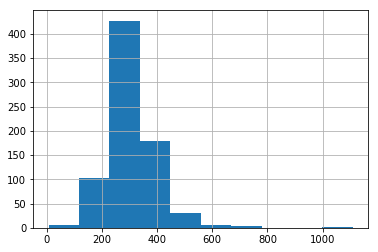

In [176]:
network.calories.hist()

In [173]:
network.head(20)

,id,label,timeset,modularity_class,clustering,componentnumber,strongcompnum,indegree,outdegree,degree,fat per calorie,mean_fpc,median_fpc,medfpc_normalized,calories
0,3171313,3171313,NaN,0,0.000000,0,2,0,2,2,NaN,NaN,NaN,NaN,NaN
1,1022640,1022640,NaN,0,0.000000,0,1,3,0,3,NaN,0.054510,0.046085,0.275961,313.0
2,21858102,21858102,NaN,0,0.000000,0,3,0,2,2,NaN,NaN,NaN,NaN,NaN
3,4970363,4970363,NaN,0,0.000000,0,4,0,2,2,NaN,NaN,NaN,NaN,NaN
4,21008876,21008876,NaN,43,0.000000,1,6,0,1,1,NaN,NaN,NaN,NaN,NaN
5,10327182,10327182,NaN,38,0.004762,1,5,15,0,15,NaN,0.060760,0.065269,0.390835,368.0
6,20574321,20574321,NaN,43,0.000000,1,7,0,1,1,NaN,NaN,NaN,NaN,NaN
7,17468111,17468111,NaN,1,0.000000,2,9,0,1,1,NaN,NaN,NaN,NaN,NaN
8,10412264,10412264,NaN,1,0.333333,2,8,3,1,4,NaN,0.052396,0.050547,0.302679,241.0
9,16631058,16631058,NaN,1,0.000000,2,10,0,1,1,NaN,NaN,NaN,NaN,NaN


In [144]:
network.to_csv('../../../../food_data/graphs/csv_w_fpc')

In [171]:
network.describe(
)

,timeset,modularity_class,clustering,componentnumber,strongcompnum,indegree,outdegree,degree,fat per calorie,mean_fpc,median_fpc,medfpc_normalized,calories
count,0.0,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,0.0,755.000000,755.000000,755.000000,3984.0
mean,NaN,89.772841,0.018937,45.777861,1902.897339,1.904869,1.904869,3.809739,NaN,0.050809,0.050547,0.302675,1110.0
std,NaN,80.578195,0.082573,87.232885,1142.162807,6.683794,4.649204,8.726373,NaN,0.009826,0.009703,0.058104,0.0
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.001064,0.001064,0.006370,1110.0
25%,NaN,44.000000,0.000000,1.000000,903.750000,0.000000,1.000000,1.000000,NaN,0.046133,0.045793,0.274210,1110.0
50%,NaN,55.000000,0.000000,1.000000,1898.500000,0.000000,1.000000,1.000000,NaN,0.051150,0.050877,0.304654,1110.0
75%,NaN,96.000000,0.000000,58.250000,2893.250000,0.000000,2.000000,2.000000,NaN,0.055097,0.055634,0.333140,1110.0
max,NaN,435.000000,0.500000,405.000000,3889.000000,40.000000,93.000000,126.000000,NaN,0.166667,0.166667,0.998004,1110.0


In [177]:
network['calories'] = network['calories']/700.

In [146]:
network['medfpc_normalized']= network['median_fpc']/.167


In [178]:
network.to_csv('../../../../food_data/graphs/csv_w_cals')

In [149]:
members_coll.find_one({'member_ID':'5049175'})

{u'_id': ObjectId('58d1a3f99d477a1e01c331c0'),
 u'aboutme': {},
 u'favorites_dict': {u'artichoke-spinach-dip-restaurant-style': u'33474',
  u'avocado-cucumber-pasta-salad-': u'257027',
  u'california-bounty-beef-and-vegetable-noodles': u'255076',
  u'cheese-and-vegetable-noodle-medley': u'255075',
  u'creamy-chicken-spread': u'215083',
  u'egg-muffin-cakes': u'256950',
  u'fabiennes-grilled-center-cut-pork-chops': u'257202',
  u'family-picnic-macaroni-salad': u'223423',
  u'funfetti-cake-mix-cookies': u'246063',
  u'mexican-squoodles-with-creamy-fire-roasted-green-chile-sauce': u'255071',
  u'meyer-lemon-avocado-toast': u'257457',
  u'moroccan-fish-tagine': u'257105',
  u'pesto-coated-center-cut-pork-chop': u'257201',
  u'quick-taco-bake-pie': u'254818',
  u'scrambled-eggs-in-a-mug': u'257530',
  u'shrimp-dip-ii': u'12753',
  u'skillet-chili-n-eggs': u'257163',
  u'todds-warm-shrimp-dip': u'17459',
  u'traditional-irish-stew': u'246418',
  u'zesty-cold-chicken-pasta-salad': u'257276'},

In [150]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities, girvan_newman

import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name girvan_newman

In [151]:
[1,2,3].count(1)

1

In [152]:
network.head()

,id,label,timeset,modularity_class,clustering,componentnumber,strongcompnum,indegree,outdegree,degree,fat per calorie,mean_fpc,median_fpc,medfpc_normalized
0,3171313,3171313,NaN,0,0.0,0,2,0,2,2,NaN,NaN,NaN,NaN
1,1022640,1022640,NaN,0,0.0,0,1,3,0,3,NaN,0.05451,0.046085,0.275961
2,21858102,21858102,NaN,0,0.0,0,3,0,2,2,NaN,NaN,NaN,NaN
3,4970363,4970363,NaN,0,0.0,0,4,0,2,2,NaN,NaN,NaN,NaN
4,21008876,21008876,NaN,43,0.0,1,6,0,1,1,NaN,NaN,NaN,NaN


In [155]:
%matplotlib inline

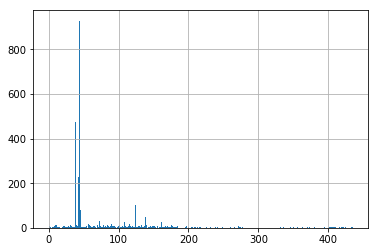

In [161]:
network.modularity_class.hist(bins=427)

In [159]:
network.modularity_class.value_counts()

44     929
89     599
38     473
43     226
124    101
45      82
64      62
139     49
73      32
161     26
15      26
109     21
61      20
92      19
85      19
90      18
58      18
118     17
167     16
116     15
79      14
10      14
40      13
31      13
140     13
96      12
176     12
133     12
101     12
181     12
      ... 
320      1
322      1
360      1
388      1
386      1
384      1
382      1
380      1
378      1
374      1
372      1
368      1
366      1
364      1
362      1
358      1
324      1
354      1
352      1
348      1
344      1
342      1
340      1
338      1
334      1
311      1
330      1
328      1
326      1
435      1
Name: modularity_class, Length: 427, dtype: int64

In [157]:
network.shape

(3984, 14)